<a href="https://colab.research.google.com/github/Muthamilarasu17/assignment1/blob/main/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-6-143b5568ac5d>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nOverall Good for light use,Overall good for light uses but not good for c...,20 August 2023
1,4.0,4.0 out of 5 stars\nSTART HANGING PROBLEM AFTE...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,22 August 2023
2,4.0,4.0 out of 5 stars\nNot happy,"Expected good performance, and little unique f...",23 August 2023
3,4.0,4.0 out of 5 stars\nNetwork coverage,It's good.,22 August 2023
4,4.0,4.0 out of 5 stars\nGood,Good,22 August 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nSuperb,Superb and excellent phone,20 July 2023
96,4.0,4.0 out of 5 stars\nCamera quality is the only...,"Camera quality is pretty poor, pales in compar...",17 July 2023
97,4.0,4.0 out of 5 stars\nBEST MOBILE,overall good mobile phone,16 July 2023
98,4.0,4.0 out of 5 stars\nBattery backup too low,I brought this phone last month and if you use...,8 July 2023


In [8]:
df.to_csv("Amazon_Reviews_Oneplus_10R.csv")


In [9]:
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nOverall Good for light use,Overall good for light uses but not good for c...,20 August 2023
1,4.0,4.0 out of 5 stars\nSTART HANGING PROBLEM AFTE...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,22 August 2023
2,4.0,4.0 out of 5 stars\nNot happy,"Expected good performance, and little unique f...",23 August 2023
3,4.0,4.0 out of 5 stars\nNetwork coverage,It's good.,22 August 2023
4,4.0,4.0 out of 5 stars\nGood,Good,22 August 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nSuperb,Superb and excellent phone,20 July 2023
96,4.0,4.0 out of 5 stars\nCamera quality is the only...,"Camera quality is pretty poor, pales in compar...",17 July 2023
97,4.0,4.0 out of 5 stars\nBEST MOBILE,overall good mobile phone,16 July 2023
98,4.0,4.0 out of 5 stars\nBattery backup too low,I brought this phone last month and if you use...,8 July 2023


In [10]:
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [12]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_10R.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nOverall Good for light use,Overall good for light uses but not good for c...,20 August 2023
1,4.0,4.0 out of 5 stars\nSTART HANGING PROBLEM AFTE...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,22 August 2023
2,4.0,4.0 out of 5 stars\nNot happy,"Expected good performance, and little unique f...",23 August 2023
3,4.0,4.0 out of 5 stars\nNetwork coverage,It's good.,22 August 2023
4,4.0,4.0 out of 5 stars\nGood,Good,22 August 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nSuperb,Superb and excellent phone,20 July 2023
96,4.0,4.0 out of 5 stars\nCamera quality is the only...,"Camera quality is pretty poor, pales in compar...",17 July 2023
97,4.0,4.0 out of 5 stars\nBEST MOBILE,overall good mobile phone,16 July 2023
98,4.0,4.0 out of 5 stars\nBattery backup too low,I brought this phone last month and if you use...,8 July 2023


In [13]:
reviews.Rating.describe()

count    100.00
mean       4.01
std        0.10
min        4.00
25%        4.00
50%        4.00
75%        4.00
max        5.00
Name: Rating, dtype: float64

In [14]:
reviews['word_count']=reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Overall good for light uses but not good for c...,35
1,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,18
2,"Expected good performance, and little unique f...",24
3,It's good.,2
4,Good,1


In [15]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Overall good for light uses but not good for c...,195.0
1,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,119.0
2,"Expected good performance, and little unique f...",143.0
3,It's good.,10.0
4,Good,4.0


In [16]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Overall good for light uses but not good for c...,4.735294
1,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,5.666667
2,"Expected good performance, and little unique f...",5.000000
3,It's good.,4.500000
4,Good,4.000000


In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Overall good for light uses but not good for c...,8
1,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,0
2,"Expected good performance, and little unique f...",9
3,It's good.,0
4,Good,0


In [18]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Overall good for light uses but not good for c...,0
1,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,0
2,"Expected good performance, and little unique f...",0
3,It's good.,0
4,Good,0


In [19]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Overall good for light uses but not good for c...,0
1,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,0
2,"Expected good performance, and little unique f...",0
3,It's good.,0
4,Good,0


In [20]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Overall good for light uses but not good for c...,0
1,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,17
2,"Expected good performance, and little unique f...",0
3,It's good.,0
4,Good,0


In [21]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','hashtags','upper'],axis=1,inplace=True)

In [22]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Overall good for light uses but not good for c...
1    START HANGING PROBLEM AFTER FOURTH MONTH of TI...
2    Expected good performance, and little unique f...
3                                           It's good.
4                                                 Good
Name: Review, dtype: object

In [23]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     20
1     22
2     23
3     22
4     22
      ..
95    20
96    17
97    16
98     8
99    14
Name: Review_Date, Length: 100, dtype: object 
 0     August
1     August
2     August
3     August
4     August
       ...  
95      July
96      July
97      July
98      July
99      July
Name: Review_Date, Length: 100, dtype: object 
 0     2023
1     2023
2     2023
3     2023
4     2023
      ... 
95    2023
96    2023
97    2023
98    2023
99    2023
Name: Review_Date, Length: 100, dtype: object


In [24]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,20,August,2023
1,22,August,2023
2,23,August,2023
3,22,August,2023
4,22,August,2023
...,...,...,...
95,20,July,2023
96,17,July,2023
97,16,July,2023
98,8,July,2023


In [25]:
df.Month.value_counts()

August      56
July        42
January      1
December     1
Name: Month, dtype: int64

In [26]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,August
1,August
2,August
3,August
4,August
...,...
95,July
96,July
97,July
98,July


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       98 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    object 
 5   Month        100 non-null    object 
 6   Year         100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [28]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       98 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    int64  
 5   Month        100 non-null    object 
 6   Year         100 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [29]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,4.0 out of 5 stars\nOverall Good for light use,Overall good for light uses but not good for c...,20,August,2023
1,4.0,4.0 out of 5 stars\nSTART HANGING PROBLEM AFTE...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,22,August,2023
2,4.0,4.0 out of 5 stars\nNot happy,"Expected good performance, and little unique f...",23,August,2023
3,4.0,4.0 out of 5 stars\nNetwork coverage,It's good.,22,August,2023
4,4.0,4.0 out of 5 stars\nGood,Good,22,August,2023


In [30]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,4.0,4.0 out of 5 stars\nOverall Good for light use,Overall good for light uses but not good for c...,20 August 2023,20,August,2023
1,4.0,4.0 out of 5 stars\nSTART HANGING PROBLEM AFTE...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,22 August 2023,22,August,2023
2,4.0,4.0 out of 5 stars\nNot happy,"Expected good performance, and little unique f...",23 August 2023,23,August,2023
3,4.0,4.0 out of 5 stars\nNetwork coverage,It's good.,22 August 2023,22,August,2023
4,4.0,4.0 out of 5 stars\nGood,Good,22 August 2023,22,August,2023
...,...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nSuperb,Superb and excellent phone,20 July 2023,20,July,2023
96,4.0,4.0 out of 5 stars\nCamera quality is the only...,"Camera quality is pretty poor, pales in compar...",17 July 2023,17,July,2023
97,4.0,4.0 out of 5 stars\nBEST MOBILE,overall good mobile phone,16 July 2023,16,July,2023
98,4.0,4.0 out of 5 stars\nBattery backup too low,I brought this phone last month and if you use...,8 July 2023,8,July,2023


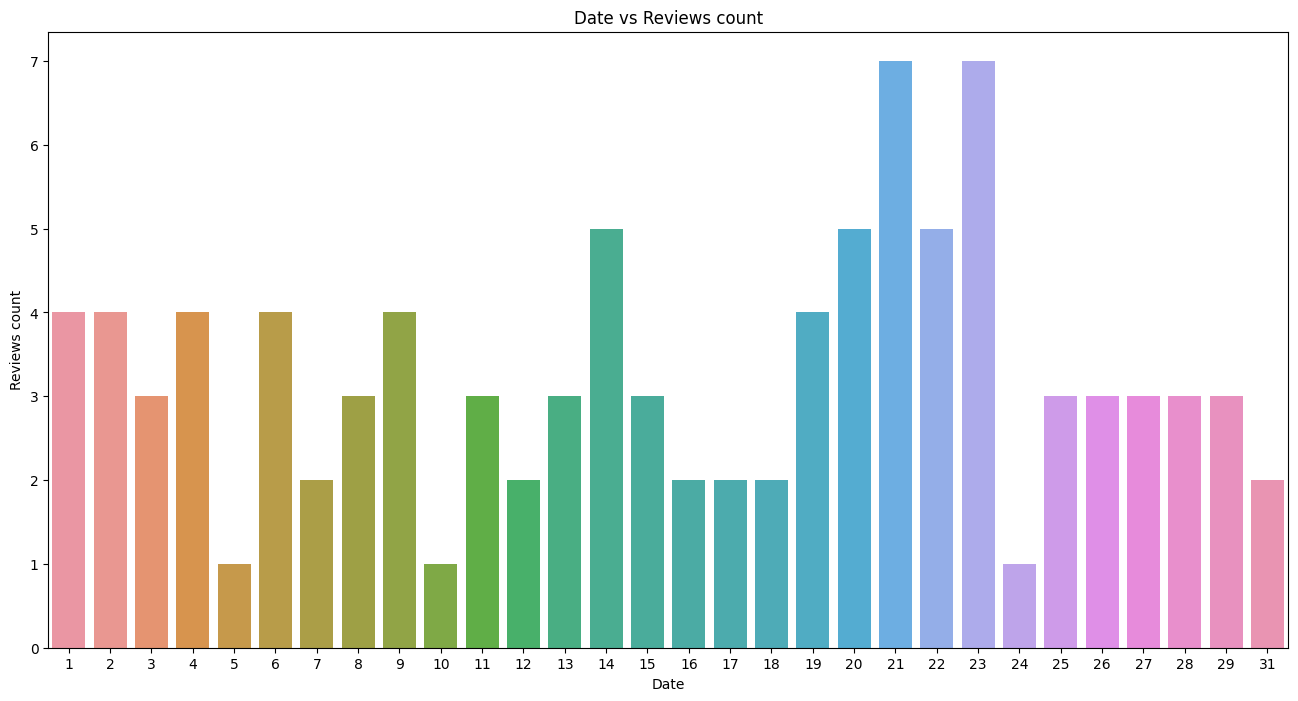

In [34]:
import matplotlib.pyplot as plt
#Creating a dataframe
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

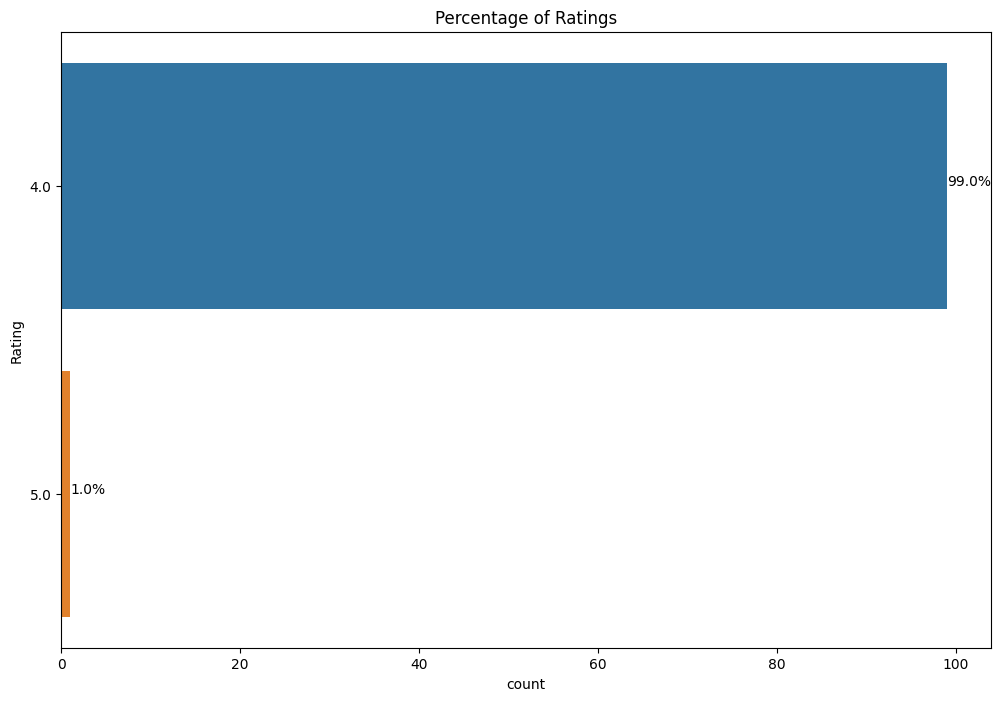

In [35]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [54]:
data1=df['Rating'].value_counts().sort_index()
data1

4.0    99
5.0     1
Name: Rating, dtype: int64

text preprocessing

In [36]:
# sentimental analysis
data=df[['Review']]
data

,Review
0,Overall good for light uses but not good for c...
1,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,"Expected good performance, and little unique f..."
3,It's good.
4,Good
...,...
95,Superb and excellent phone
96,"Camera quality is pretty poor, pales in compar..."
97,overall good mobile phone
98,I brought this phone last month and if you use...


In [37]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [38]:
data

,Review
0,overall good light uses good camera lovers. in...
1,start hanging problem after fourth month to ti...
2,"expected good performance, little unique other..."
3,it's good.
4,good
...,...
95,superb excellent phone
96,"camera quality pretty poor, pales comparison l..."
97,overall good mobile phone
98,i brought phone last month use use battery bac...


In [39]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [40]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,expected good performance little unique brand ...,"Expected good performance, and little unique f..."
3,good,It's good.
4,good,Good


In [41]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [66]:
import pandas as pd
import numpy as np
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,expected good performance little unique brand ...,"Expected good performance, and little unique f..."
3,good,It's good.
4,good,Good
5,like,I like it
6,one plus nord ce luxury phone g connectivity g...,One plus Nord CE 2 is the luxury phone with 5 ...
7,never settle one plus one plus,"Never settle, One plus is one plus"
8,writing review using month budget phone actual...,I am writing this review after using 6 months....
9,looking phone replace asus max pro little bit ...,I was looking for a phone which can replace my...


In [67]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)
#http

,Clean_Reviews,Uncleaned_Reviews
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,expected good performance little unique brand ...,"Expected good performance, and little unique f..."
3,good,It's good.
4,good,Good
5,like,I like it
6,one plus nord ce luxury phone g connectivity g...,One plus Nord CE 2 is the luxury phone with 5 ...
7,never settle one plus one plus,"Never settle, One plus is one plus"
8,writing review using month budget phone actual...,I am writing this review after using 6 months....
9,looking phone replace asus max pro little bit ...,I was looking for a phone which can replace my...


In [68]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)# empty text

,Clean_Reviews,Uncleaned_Reviews
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,expected good performance little unique brand ...,"Expected good performance, and little unique f..."
3,good,It's good.
4,good,Good
5,like,I like it
6,one plus nord ce luxury phone g connectivity g...,One plus Nord CE 2 is the luxury phone with 5 ...
7,never settle one plus one plus,"Never settle, One plus is one plus"
8,writing review using month budget phone actual...,I am writing this review after using 6 months....
9,looking phone replace asus max pro little bit ...,I was looking for a phone which can replace my...


In [69]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)# duplicate rows

,Clean_Reviews,Uncleaned_Reviews
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,expected good performance little unique brand ...,"Expected good performance, and little unique f..."
3,good,It's good.
4,good,Good
5,like,I like it
6,one plus nord ce luxury phone g connectivity g...,One plus Nord CE 2 is the luxury phone with 5 ...
7,never settle one plus one plus,"Never settle, One plus is one plus"
8,writing review using month budget phone actual...,I am writing this review after using 6 months....
9,looking phone replace asus max pro little bit ...,I was looking for a phone which can replace my...


In [70]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)# resetting index

,Clean_Reviews,Uncleaned_Reviews
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,expected good performance little unique brand ...,"Expected good performance, and little unique f..."
3,good,It's good.
4,good,Good
5,like,I like it
6,one plus nord ce luxury phone g connectivity g...,One plus Nord CE 2 is the luxury phone with 5 ...
7,never settle one plus one plus,"Never settle, One plus is one plus"
8,writing review using month budget phone actual...,I am writing this review after using 6 months....
9,looking phone replace asus max pro little bit ...,I was looking for a phone which can replace my...


In [71]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [72]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,expected good performance little unique brand ...,"Expected good performance, and little unique f..."
3,good,It's good.
4,good,Good
5,like,I like it
6,one plus nord ce luxury phone g connectivity g...,One plus Nord CE 2 is the luxury phone with 5 ...
7,never settle one plus one plus,"Never settle, One plus is one plus"
8,writing review using month budget phone actual...,I am writing this review after using 6 months....
9,looking phone replace asus max pro little bit ...,I was looking for a phone which can replace my...


In [73]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [74]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,expected good performance little unique brand ...,"Expected good performance, and little unique f..."
3,good,It's good.
4,good,Good
5,like,I like it
6,one plus nord ce luxury phone g connectivity g...,One plus Nord CE 2 is the luxury phone with 5 ...
7,never settle one plus one plus,"Never settle, One plus is one plus"
8,writing review using month budget phone actual...,I am writing this review after using 6 months....
9,looking phone replace asus max pro little bit ...,I was looking for a phone which can replace my...


In [75]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...,"[overall, good, light, us, good, camera, lover..."
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,"[start, hanging, problem, fourth, month, till,..."
2,expected good performance little unique brand ...,"Expected good performance, and little unique f...","[expected, good, performance, little, unique, ..."
3,good,It's good.,[good]
4,good,Good,[good]
5,like,I like it,[like]
6,one plus nord ce luxury phone g connectivity g...,One plus Nord CE 2 is the luxury phone with 5 ...,"[one, plus, nord, ce, luxury, phone, g, connec..."
7,never settle one plus one plus,"Never settle, One plus is one plus","[never, settle, one, plus, one, plus]"
8,writing review using month budget phone actual...,I am writing this review after using 6 months....,"[writing, review, using, month, budget, phone,..."
9,looking phone replace asus max pro little bit ...,I was looking for a phone which can replace my...,"[looking, phone, replace, asus, max, pro, litt..."


In [76]:
dataframe.drop(['tokenized_tweets'], axis=1, inplace=True)

In [77]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [78]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [79]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...
2,expected good performance little unique brand ...,"Expected good performance, and little unique f..."
3,good,It's good.
4,good,Good
5,like,I like it
6,one plus nord ce luxury phone g connectivity g...,One plus Nord CE 2 is the luxury phone with 5 ...
7,never settle one plus one plus,"Never settle, One plus is one plus"
8,writing review using month budget phone actual...,I am writing this review after using 6 months....
9,looking phone replace asus max pro little bit ...,I was looking for a phone which can replace my...


In [80]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['start', 'hanging', 'problem', 'fourth', 'month', 'till', 'continue', 'problem', 'restart', 'ya', 'flight', 'mode'])

In [81]:
tokenized_review =dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [overall, good, light, us, good, camera, lover...
1    [start, hanging, problem, fourth, month, till,...
2    [expected, good, performance, little, unique, ...
3                                               [good]
4                                               [good]
5                                               [like]
6    [one, plus, nord, ce, luxury, phone, g, connec...
7                [never, settle, one, plus, one, plus]
8    [writing, review, using, month, budget, phone,...
9    [looking, phone, replace, asus, max, pro, litt...
Name: Clean_Reviews, dtype: object

In [82]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [83]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,overal good light us good camera lover day lig...
1,start hang problem fourth month till continu p...
2,expect good perform littl uniqu brand showcas ...
3,good
4,good
...,...
94,superb excel phone
95,camera qualiti pretti poor pale comparison lik...
96,overal good mobil phone
97,brought phone last month use use batteri backu...


In [84]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,overall good light u good camera lover day lig...
1,start hanging problem fourth month till contin...
2,expected good performance little unique brand ...
3,good
4,good
...,...
94,superb excellent phone
95,camera quality pretty poor pale comparison lik...
96,overall good mobile phone
97,brought phone last month use use battery backu...


In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [86]:
print(cv.get_feature_names_out()[109:200])

['description' 'design' 'device' 'different' 'dilevered' 'direct'
 'dislike' 'display' 'done' 'draw' 'drawback' 'durable' 'dutycamera'
 'easily' 'either' 'end' 'especially' 'established' 'even' 'every'
 'everything' 'evident' 'excellent' 'exchange' 'expected' 'expensive'
 'experience' 'expert' 'extendable' 'extra' 'facebook' 'facility' 'fact'
 'factor' 'fall' 'fast' 'fastvery' 'feature' 'feel' 'feeling' 'field'
 'fil' 'final' 'fine' 'finger' 'fingerprint' 'first' 'flash' 'flexible'
 'flight' 'fourth' 'front' 'functin' 'function' 'future' 'gamers' 'gaming'
 'gb' 'generally' 'genuine' 'get' 'give' 'given' 'giving' 'go' 'going'
 'good' 'goodbattery' 'goodinterface' 'goodsuperb' 'google' 'great' 'gud'
 'hai' 'hand' 'handle' 'handling' 'hang' 'hanging' 'happening' 'happy'
 'heating' 'hence' 'high' 'hit' 'ho' 'hoping' 'hotspot' 'hour' 'hr' 'hype']


In [87]:
print(cv.get_feature_names_out()[100:200])

['daam' 'daamo' 'daily' 'damage' 'daughter' 'day' 'delete' 'deleted'
 'delivery' 'description' 'design' 'device' 'different' 'dilevered'
 'direct' 'dislike' 'display' 'done' 'draw' 'drawback' 'durable'
 'dutycamera' 'easily' 'either' 'end' 'especially' 'established' 'even'
 'every' 'everything' 'evident' 'excellent' 'exchange' 'expected'
 'expensive' 'experience' 'expert' 'extendable' 'extra' 'facebook'
 'facility' 'fact' 'factor' 'fall' 'fast' 'fastvery' 'feature' 'feel'
 'feeling' 'field' 'fil' 'final' 'fine' 'finger' 'fingerprint' 'first'
 'flash' 'flexible' 'flight' 'fourth' 'front' 'functin' 'function'
 'future' 'gamers' 'gaming' 'gb' 'generally' 'genuine' 'get' 'give'
 'given' 'giving' 'go' 'going' 'good' 'goodbattery' 'goodinterface'
 'goodsuperb' 'google' 'great' 'gud' 'hai' 'hand' 'handle' 'handling'
 'hang' 'hanging' 'happening' 'happy' 'heating' 'hence' 'high' 'hit' 'ho'
 'hoping' 'hotspot' 'hour' 'hr' 'hype']


In [88]:
print(tweetscv.toarray()[100:200])

[]


In [89]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


  0%|          | 0/99 [00:00<?, ?it/s]

In [90]:
corpus[3]

'good'

In [91]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X= cv.fit_transform(corpus).toarray()

In [92]:
X.shape

(99, 2310)

In [93]:
cv.get_feature_names_out()[:20]

array(['abt', 'abt bcoz', 'abt bcoz sometim', 'abt order',
       'abt order onlin', 'accept', 'accept expert',
       'accept expert comman', 'acha', 'acha hai', 'acha phone',
       'acha phone hai', 'achh', 'achh product', 'achh product iss',
       'achiev', 'achiev hr', 'achiev hr plu', 'achiev screen',
       'achiev screen time'], dtype=object)

In [94]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [95]:
count_df=pd.DataFrame(X, columns=cv.get_feature_names_out())

In [96]:
count_df

,abt,abt bcoz,abt bcoz sometim,abt order,abt order onlin,accept,accept expert,accept expert comman,acha,acha hai,...,ya flight,ya flight mode,year,year bit,year bit costli,year undercut,year undercut establish,youtub,youtub instagram,youtub instagram facebook
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


  0%|          | 0/99 [00:00<?, ?it/s]

In [98]:
corpus[4]

'good'

In [99]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [100]:
X.shape

(99, 2310)

In [101]:
tfidf_v.get_feature_names_out()[:20]

array(['abt', 'abt bcoz', 'abt bcoz sometim', 'abt order',
       'abt order onlin', 'accept', 'accept expert',
       'accept expert comman', 'acha', 'acha hai', 'acha phone',
       'acha phone hai', 'achh', 'achh product', 'achh product iss',
       'achiev', 'achiev hr', 'achiev hr plu', 'achiev screen',
       'achiev screen time'], dtype=object)

In [102]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [103]:
count_df=pd.DataFrame(X,columns=tfidf_v.get_feature_names_out())
count_df

,abt,abt bcoz,abt bcoz sometim,abt order,abt order onlin,accept,accept expert,accept expert comman,acha,acha hai,...,ya flight,ya flight mode,year,year bit,year bit costli,year undercut,year undercut establish,youtub,youtub instagram,youtub instagram facebook
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.174691,0.174691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'overall good light us good camera lover day light outdoor camera quality best indoor camera quality good pro one plus mobile use experience awesome start hanging problem fourth month till continue problem restart ya flight mode expected good performance little unique brand showcase real fact nothing better realme redmi vivo good good like one plus nord ce luxury phone g connectivity good quality camera storage never settle one plus one plus writing review using month budget phone actually good camera quality average good bad oxygen nice feeling phone redmi realme phone one plus loosing authenticity otherwise phone quite good till hanging issue brightness ok ok looking phone replace asus max pro little bit apprehensive abt ordering online turned expected genuine leaving aside hype oneplus phone ordinary android phone weak battery facility nfc near field communication inevitable future packaging quality perfect well using last working smoothly battery good overall mobile performance goo

In [105]:
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [106]:
for token in  doc_block[:50]:
  print(token, token.pos_)

overall ADV
good ADJ
light NOUN
us PRON
good ADJ
camera NOUN
lover PROPN
day NOUN
light ADJ
outdoor ADJ
camera NOUN
quality NOUN
best ADJ
indoor ADJ
camera NOUN
quality NOUN
good ADJ
pro ADJ
one NUM
plus CCONJ
mobile ADJ
use NOUN
experience NOUN
awesome ADJ
start VERB
hanging VERB
problem NOUN
fourth ADJ
month NOUN
till AUX
continue VERB
problem NOUN
restart PROPN
ya PROPN
flight NOUN
mode NOUN
expected VERB
good ADJ
performance NOUN
little ADJ
unique ADJ
brand NOUN
showcase NOUN
real ADJ
fact NOUN
nothing PRON
better ADJ
realme NOUN
redmi INTJ
vivo VERB


In [107]:
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time', 'hour', 'given', 'speed', 'charger', 'battery', 'issue', 'tweaking', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'apps', 'background', 'achieve', 'hr', 'screen', 'time', 'peace', 'mobile', 'feel', 'weightis', 'performance', 'mobile', 'budget', 'good', 'accept', 'expert', 'comman', 'man', 'working', 'brand', 'name', 'performance', 'battery', 'camera', 'better', 'design', 'adapter', 'cover', 'included', 'phone', 'budget', 'type', 'product', 'seen', 'quality', 'camera', 'using', 'option', 'phone', 'work', 'phone', 'budget', 'product', 'performance', 'purchased', 'version', 'phone', 'come', 'gb', 'ram']


In [108]:
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time', 'hour', 'given', 'speed', 'charger', 'battery', 'issue', 'tweaking', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'apps', 'background', 'achieve', 'hr', 'screen', 'time', 'peace', 'mobile', 'feel', 'weightis', 'performance', 'mobile', 'budget', 'good', 'accept', 'expert', 'comman', 'man', 'working', 'brand', 'name', 'performance', 'battery', 'camera', 'better', 'design', 'adapter', 'cover', 'included', 'phone', 'budget', 'type', 'product', 'seen', 'quality', 'camera', 'using', 'option', 'phone', 'work', 'phone', 'budget', 'product', 'performance', 'purchased', 'version', 'phone', 'come', 'gb', 'ram']


In [109]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,43
1,camera,25
2,product,25
3,quality,21
4,price,16
5,battery,15
6,use,13
7,performance,10
8,using,10
9,budget,9


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

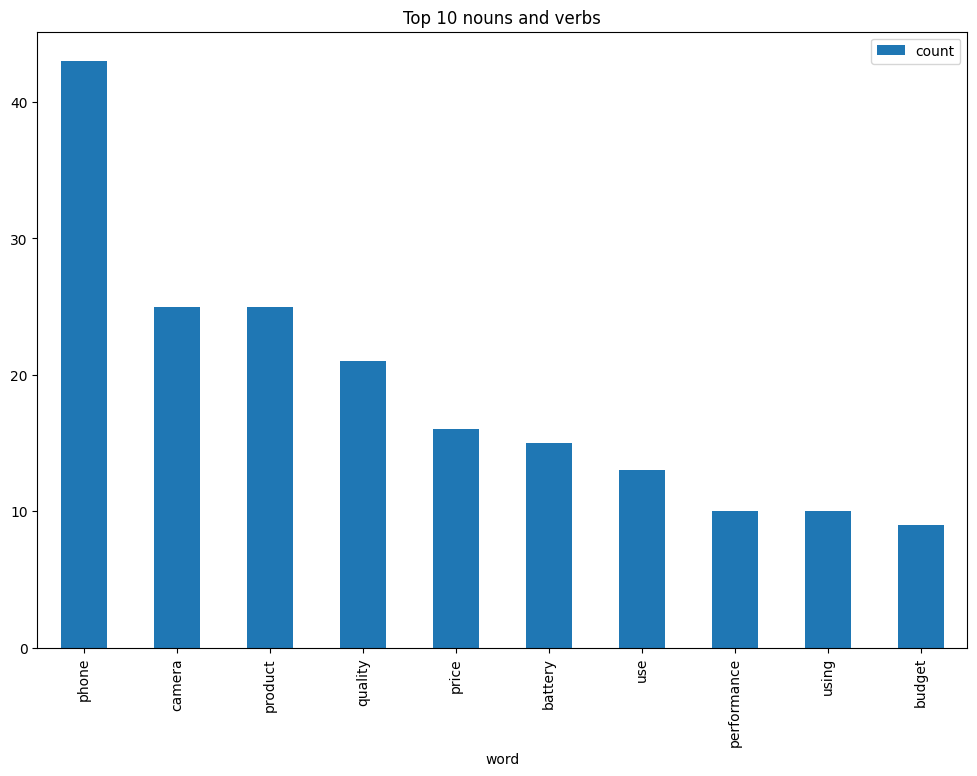

In [110]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [111]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


In [112]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [113]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,95
neg,4


In [114]:
dataframe.Clean_Reviews[8]

'writing review using month budget phone actually good camera quality average good bad oxygen nice feeling phone redmi realme phone one plus loosing authenticity otherwise phone quite good till hanging issue brightness ok ok'

In [115]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.072, 'neu': 0.515, 'pos': 0.412, 'compound': 0.926}

In [116]:
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.072, 'neu': 0.515, 'pos': 0.412, 'compound': 0.926}

In [117]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,overall good light us good camera lover day li...,"{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp..."
1,start hanging problem fourth month till contin...,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp..."
2,expected good performance little unique brand ...,"{'neg': 0.139, 'neu': 0.693, 'pos': 0.168, 'co..."
3,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
4,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [118]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,overall good light us good camera lover day li...,"{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp...",0.9674
1,start hanging problem fourth month till contin...,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",-0.6597
2,expected good performance little unique brand ...,"{'neg': 0.139, 'neu': 0.693, 'pos': 0.168, 'co...",0.1265
3,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404
4,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404


In [119]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,overall good light us good camera lover day li...,"{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp...",0.9674,Positive
1,start hanging problem fourth month till contin...,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",-0.6597,Negative
2,expected good performance little unique brand ...,"{'neg': 0.139, 'neu': 0.693, 'pos': 0.168, 'co...",0.1265,Positive
3,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
4,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
...,...,...,...,...
94,superb excellent phone,"{'neg': 0.0, 'neu': 0.114, 'pos': 0.886, 'comp...",0.8316,Positive
95,camera quality pretty poor pale comparison lik...,"{'neg': 0.119, 'neu': 0.463, 'pos': 0.418, 'co...",0.9271,Positive
96,overall good mobile phone,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,Positive
97,brought phone last month use use battery backu...,"{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",0.6486,Positive


In [120]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

In [121]:
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plot')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [127]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
2,Positive,85
1,Neutral,11
0,Negative,3


<Axes: xlabel='sentiment', ylabel='count'>

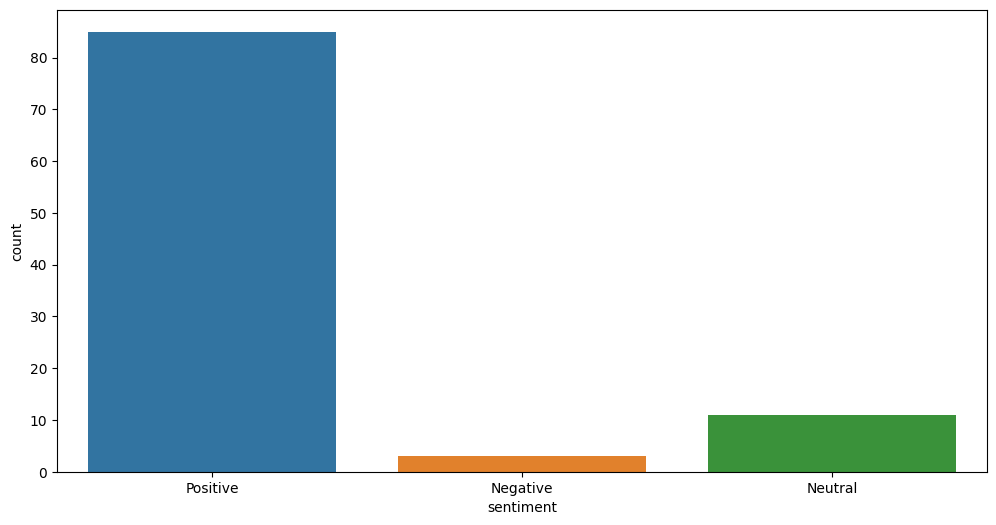

In [128]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<ipython-input-129-6e1c4ca2eb01>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

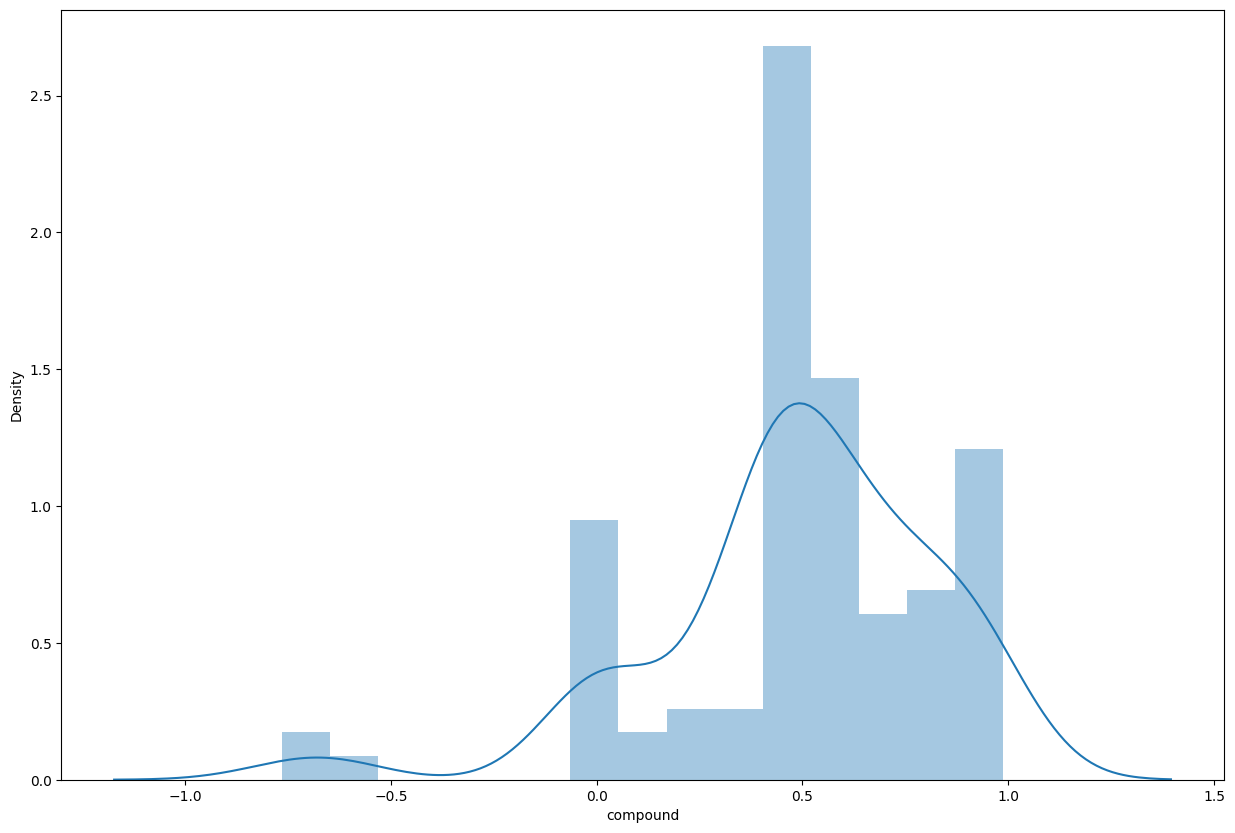

In [129]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [131]:
df['word_count']=df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,overall good light us good camera lover day li...,24
1,start hanging problem fourth month till contin...,12
2,expected good performance little unique brand ...,14
3,good,1
4,good,1


<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

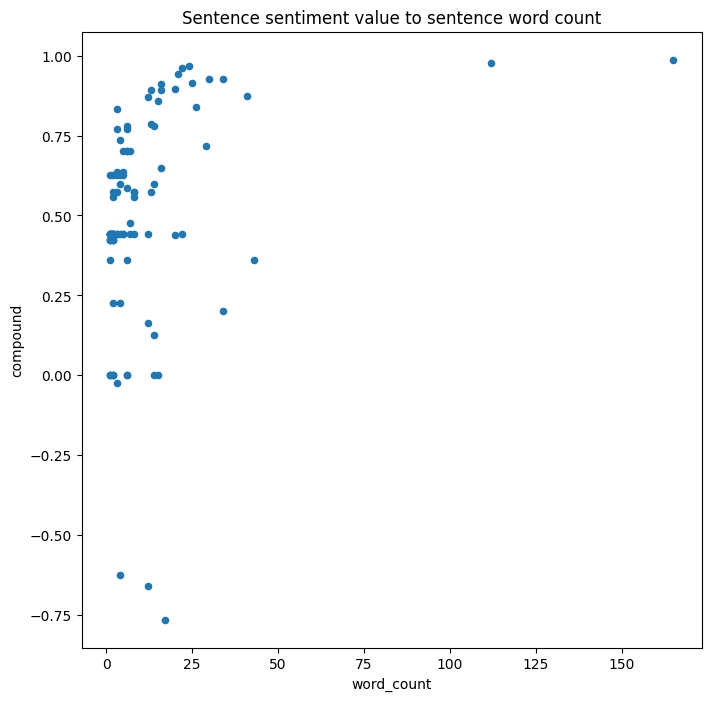

In [132]:
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [133]:
sentiments_using_textblob =dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,96
neg,3


In [134]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...,0.5625,0.612500
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,0.0000,0.000000
2,expected good performance little unique brand ...,"Expected good performance, and little unique f...",0.5500,0.247917
3,good,It's good.,0.6000,0.700000
4,good,Good,0.6000,0.700000


Text(0, 0.5, 'Subjectivity')

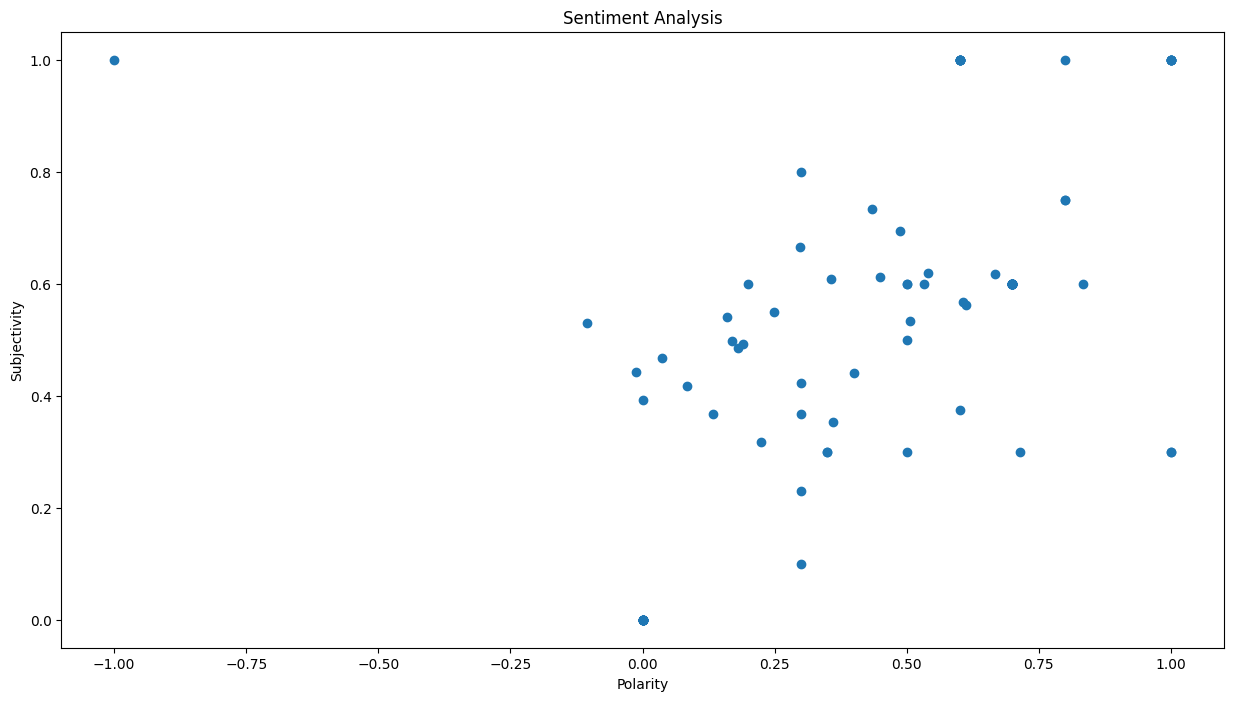

In [135]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [136]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [137]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,overall good light us good camera lover day li...,Overall good for light uses but not good for c...,0.5625,0.612500,pos
1,start hanging problem fourth month till contin...,START HANGING PROBLEM AFTER FOURTH MONTH TO TI...,0.0000,0.000000,neg
2,expected good performance little unique brand ...,"Expected good performance, and little unique f...",0.5500,0.247917,pos
3,good,It's good.,0.6000,0.700000,pos
4,good,Good,0.6000,0.700000,pos


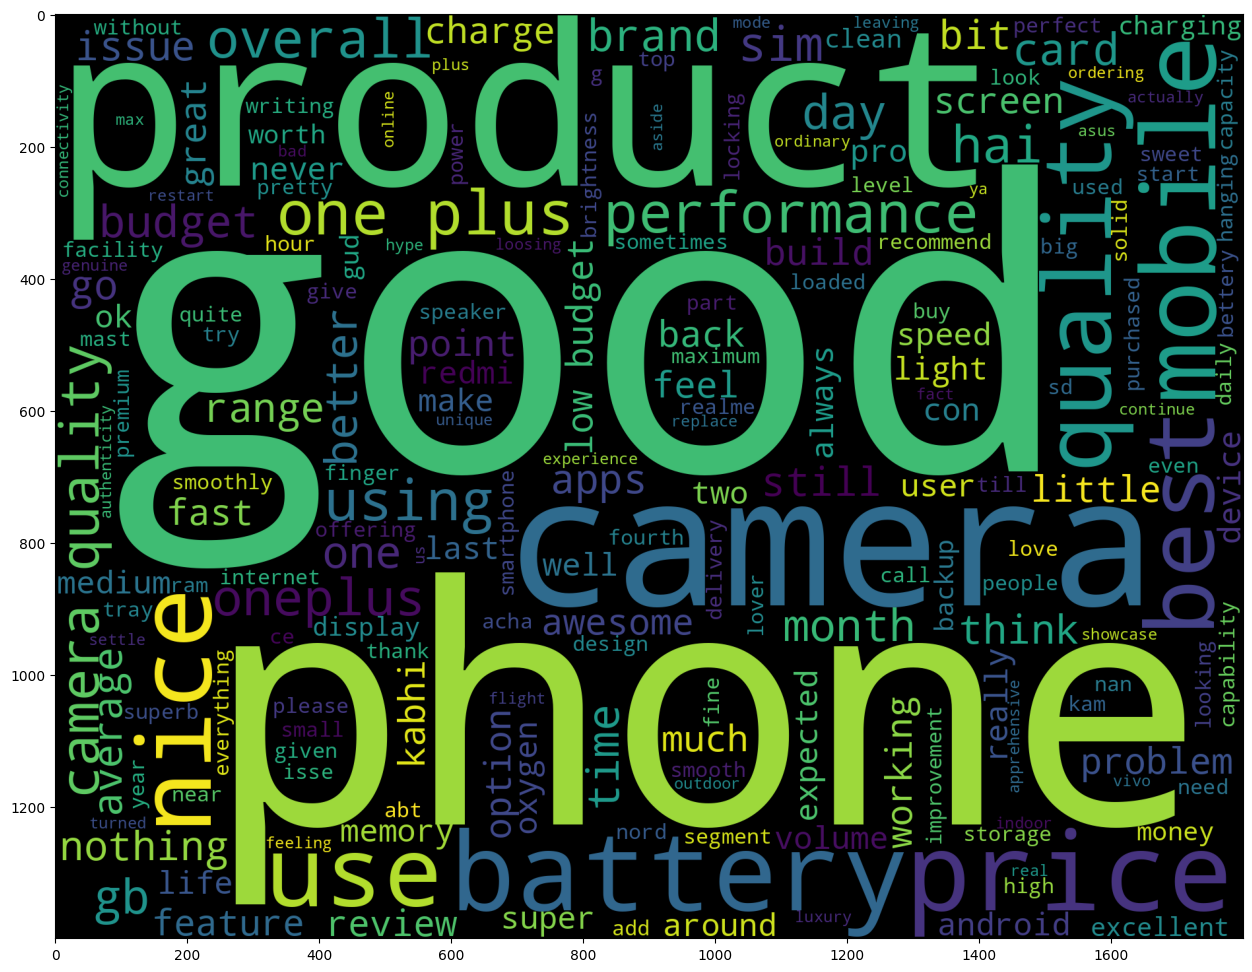

In [138]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)